<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Examen 01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
# <font color='264CC7'> Indicaciones </font>

- En esta actividad se evalúa si el estudiante *(Criterio 2.1) Emplea modelos de aprendizaje no supervisado, realizando un análisis crítico de su rendimiento y aplicabilidad en diferentes contextos*.
- En caso de considerar que existe un error en alguna pregunta o que esta se encuentra mal planteada, se debe indicar cuál es el error y justificarlo.
- Todas las soluciones deben estar correctamente redactadas, comentadas y explicadas.
- Se asignarán 4 puntos por **«Buen código»** y 4 puntos por **«Buen formato»**.
- Se calificará **únicamente hasta la celda que compile** al ejecutar «Run All».
- Es posible utilizar cualquier material del curso. Sin embargo, no se puede colaborar, comunicarse ni compartir material con otras personas.
- Está permitido utilizar internet para buscar información, pero no está permitido utilizar redes sociales, foros, grupos, chats o similares para solicitar ayuda.
- Está permitido el uso de chatbots de Inteligencia Artificial, así como completadores automáticos de código. Colocar aquí los que utilizaste:
- En todos los lugares donde se requiera una semilla aleatoria, utiliza los últimos **dos dígitos de tu cédula**. Escribe tu número de cédula aquí:

---
# <font color='264CC7'> Introducción </font>

A lo largo de esta examne veremos como aplicar distintas técnicas de aprendizaje no supervisado así como algunas de sus aplicaciones reales:

 - **[Métodos de *clustering*](#ej1):** 17 puntos
 - **[Ejemplo práctico](#ej2):** 25 puntos

Para ello vamos a necesitar las siguientes librerías:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

---
<a id="ej1"></a>
# <font color='264CC7'> Métodos de *clustering* (17 puntos) </font>


Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

## <font color='264CC7'> Datos </font>

El conjunto de datos tiene 2 variables (columnas) organizadas en la matriz *X* y tantas filas como muestras. Existe también una variable que contiene las etiquetas reales de los clústeres, **pero no debe ser utilizada** durante la construcción ni la evaluación de los modelos.

El objetivo es identificar las estructuras latentes presentes en los datos mediante distintas técnicas de *clustering*.

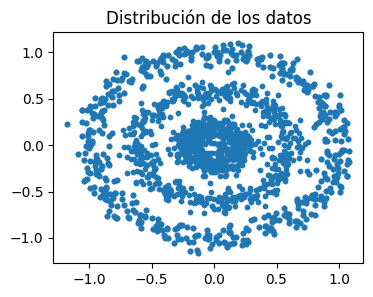

In [13]:
X_circles1, _ = make_circles(n_samples=1000, factor=.6, noise=.07, random_state=42)
X_circles2, _ = make_circles(n_samples=1000, factor=.2, noise=.07, random_state=42)

# Juntamos los datos en un solo conjunto.
X_circles = np.vstack((X_circles1, X_circles2))

# Graficamos los datos.
plt.figure(figsize=(4, 3))
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=10)
plt.title('Distribución de los datos')
plt.show()

## <font color='264CC7'> k-Means Clustering (6 puntos) </font>

### <font color='264CC7'> Parte 1: Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Aplica el método del codo para determinar el número óptimo de clústeres:
<ul>
<li>Calcula la inercia para valores de k de 1 a 10.</li>
<li>Grafica la inercia frente al número de clústeres.</li>
<li>Identifica visualmente el punto del "codo" y justifica tu elección desde una perspectiva matemática y conceptual.</li>
</ul>
</div>

### <font color='264CC7'> Evaluación crítica del método </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Entrena un modelo de K-Means con el número de clústeres seleccionado. Luego:
<ul>
<li>Grafica los datos coloreados según la asignación de clúster.</li>
<li>Explica si el modelo ha logrado identificar la estructura natural de los datos. ¿Qué limitaciones observas en el resultado?</li>
<li>Reflexiona sobre las condiciones geométricas bajo las cuales K-Means funciona adecuadamente y por qué podría no ser el algoritmo más adecuado para este tipo de distribución.</li>
</ul>
</div>

---
## <font color='264CC7'> Agrupamiento Jerárquico (7 puntos) </font>

### <font color='264CC7'> Análisis comparativo de criterios de enlace </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Realiza un análisis exhaustivo de agrupamiento jerárquico utilizando distintos criterios de enlace:
<ul>
  <li>Define una lista de métodos de enlace: 'single', 'complete', 'average', 'ward'.</li>
  <li>Para cada criterio, ejecuta los siguientes pasos:
    <ul>
      <li>Aplica el algoritmo de clustering jerárquico a los datos.</li>
      <li>Segmenta el dataset en tres clústeres utilizando un umbral adecuado en el dendrograma.</li>
      <li>Visualiza, para cada criterio:
        <ul>
          <li>Un gráfico de dispersión de los datos coloreados por clúster.</li>
          <li>El dendrograma correspondiente, señalando visualmente el corte realizado.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Organiza todas las visualizaciones en un único conjunto de subplots, con dos columnas (gráfico de dispersión / dendrograma) y cuatro filas (uno por cada método de enlace).</li>
</ul>
</div>



### <font color='264CC7'> Evaluación crítica del método </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Analiza y responde:
<ul>
  <li>¿Cuál de los métodos ('single', 'complete', 'average', 'ward') ha capturado mejor la estructura subyacente de los datos? Justifica tu respuesta en términos de:
    <ul>
      <li>Separabilidad visual de los clústeres.</li>
      <li>Forma y cohesión de los grupos encontrados.</li>
      <li>Propiedades geométricas del dataset inicial.</li>
    </ul>
  </li>
  <li>Discute brevemente una ventaja y una desventaja del uso de agrupamiento jerárquico frente a métodos particionales como K-Means en este tipo de problemas.</li>
</ul>
</div>

---
## <font color='264CC7'> Algoritmos basados en densidad: DBSCAN (8 puntos) </font>

### <font color='264CC7'> Ajuste de parámetros y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Explora el comportamiento de DBSCAN variando el parámetro <code>eps</code>:
<ul>
  <li>Aplica el algoritmo DBSCAN con <code>min_samples=5</code> y <code>eps</code> en los valores {0.07, 0.08, 0.09, 0.10}.</li>
  <li>Para cada configuración:
    <ul>
      <li>Visualiza los resultados mediante un gráfico de dispersión, coloreando por clúster e identificando valores atípicos (noise).</li>
      <li>Incluye el número de clústeres y el porcentaje de puntos clasificados como ruido en el título de cada gráfico.</li>
    </ul>
  </li>
  <li>Organiza las visualizaciones en subplots (2 filas x 2 columnas).</li>
  <li>Selecciona el mejor valor de <code>eps</code> con base en:
    <ul>
      <li>Separación visual de los clústeres.</li>
      <li>Minimización de puntos etiquetados como ruido, sin pérdida de estructura natural.</li>
    </ul>
  </li>
  <li>Justifica tu elección en no más de cinco líneas.</li>
</ul>
</div>

### <font color='264CC7'> Profundización en el ajuste de <code>min_samples</code> </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Con el mejor valor de <code>eps</code> encontrado:
<ul>
  <li>Varia el parámetro <code>min_samples</code> en los valores {4, 5, 6, 7}.</li>
  <li>Para cada caso:
    <ul>
      <li>Visualiza los resultados mediante un gráfico de dispersión, con la misma codificación de colores.</li>
      <li>Indica en el título el número de clústeres detectados y el porcentaje de ruido.</li>
    </ul>
  </li>
  <li>Organiza los resultados en subplots (2 filas x 2 columnas).</li>
  <li>Compara los efectos de variar <code>min_samples</code> sobre la detección de clústeres y la sensibilidad ante el ruido.</li>
</ul>
</div>

### <font color='264CC7'> Análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Reflexiona críticamente sobre los resultados obtenidos:
<ul>
  <li>Describe cómo cambiaron los clústeres y la cantidad de ruido al variar los parámetros <code>eps</code> y <code>min_samples</code>.</li>
  <li>Explica qué configuraciones favorecieron una mejor separación de los clústeres naturales.</li>
  <li>Justifica, con base en las características geométricas del dataset (círculos), por qué DBSCAN puede detectar estructuras que otros métodos como K-Means no identifican adecuadamente.</li>
</ul>
</div>


---
<a id="ej2"></a>
# <font color='264CC7'> Ejemplo práctico (25 puntos) </font>

Trabajarás con un subconjunto del conjunto de datos **MNIST**, que contiene imágenes de dígitos escritos a mano. Tu objetivo es aplicar técnicas de *clustering* para agrupar las imágenes según patrones estructurales, sin usar las etiquetas reales.

Utilizarás los siguientes datos (cambia la semilla por los últimos 2 dígitos de tu cédula):

In [3]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

# Tomo aleatoriamente 1000 muestras
np.random.seed(75) # Cambiar por último dos dígitos de la cédula
indices = np.random.choice(len(X), 5000, replace=False)
X = X.iloc[indices]
y = y[indices]
# Reinicio los índices
X.reset_index(drop=True, inplace=True)

display(X.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color='264CC7'> Introducción y Contexto (2 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Investiga:
<ul>
  <li>¿Qué es el dataset MNIST y cuál es su relevancia en la investigación en Machine Learning?</li>
  <li>Describe su estructura: ¿qué representan las filas y las columnas?</li>
  <li>Incluye al menos dos referencias bibliográficas correctamente citadas.</li>
</ul>
</div>


Para poder visualizar los datos, los convertiremos en un formato de imagen.

In [4]:
# Reorganizar los datos para que sean imágenes
n_images = X.shape[0]
X_images = X.to_numpy().reshape(n_images, 28, 28)
X = X_images.reshape(n_images, 28 * 28)

Con esto, podemos visualizar las imágenes de los dígitos y analizar los resultados obtenidos. Por ejemplo:

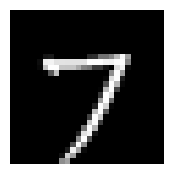

In [5]:
# Graficamos una imagen
plt.figure(figsize=(2, 2))
plt.imshow(X_images[75], cmap='gray') # Cambiar por últimos dígitos de tu cédula
plt.axis('off')
plt.show()

---

## <font color='264CC7'> k-Means (9 puntos) </font>

### <font color='264CC7'> Determinación del número de clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
Aplica el método del codo para determinar el número óptimo de clústeres:
<ul>
  <li>Entrena modelos de K-Means para valores de k entre 1 y 20.</li>
  <li>Genera una gráfica de inercia frente al número de clústeres.</li>
  <li>Identifica visualmente el punto del "codo" y selecciona el número óptimo de clústeres.</li>
  <li>Discute:
    <ul>
      <li>¿El número óptimo coincide con el número de dígitos (0–9)?</li>
      <li>¿Qué dificultades podría presentar este conjunto de datos para el método de K-Means?</li>
    </ul>
  </li>
</ul>
</div>

### <font color='264CC7'> Asignación de grupos y visualización </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Asigna los datos a los clústeres obtenidos:
<ul>
  <li>Muestra cinco imágenes aleatorias de cada clúster asignado.</li>
  <li>Organiza las imágenes en una figura clara y etiquetada.</li>
</ul>
</div>

### <font color='264CC7'> Descripción de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Analiza los grupos formados:
<ul>
  <li>Describe las principales características visuales de cada grupo.</li>
  <li>Asigna un "nombre" representativo a cada clúster (por ejemplo: "número 3 estilizado", "número 8 redondeado", etc.).</li>
</ul>
</div>

### <font color='264CC7'> Evaluación cuantitativa de los clústeres </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Evalúa objetivamente la calidad de los clústeres:
<ul>
  <li>Calcula el promedio del índice de silueta para la partición obtenida.</li>
  <li>Interpreta el valor: ¿qué tan compactos y bien separados son los grupos?</li>
</ul>
</div>

---
## <font color='264CC7'> Reducción de dimensiones y k-Means (11 puntos) </font>

### <font color='264CC7'> Reducción de dimensiones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza una reducción de dimensiones de los datos utilizando PCA.
<ul>
  <li>Realiza un análisis de componentes principales para 100 componentes y grafica la varianza explicada acumulada.</li>
  <li>Selecciona el número de componentes principales que expliquen al menos el 80% de la varianza.</li>
  <li>Transforma los datos originales en el espacio de las componentes principales.</li>
</ul>
</div>

### <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio  (2 puntos):</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 20.</li>
  <li>Identifica visualmente el «codo» en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>¿Concuerda tu elección con el número de dígitos que se esperan en el conjunto de datos? Explica qué está pasando.</li>
</ul>
</div>

### <font color='264CC7'> Asignación de grupos y análisis </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Muestra 5 integrantes de cada grupo (como imágenes).</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (2 puntos):</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

---
## <font color='264CC7'> Análisis finial (3 puntos) </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio (3 puntos):</strong><br>
    Realiza un análisis crítico de los resultados obtenidos en los distintos modelos de *clustering*. ¿Qué modelo se ha comportado mejor? ¿Por qué?
</div>
